In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob


[[[188 188 188]
  [188 188 188]
  [188 188 188]
  ...
  [188 188 188]
  [188 188 188]
  [188 188 188]]

 [[188 188 188]
  [188 188 188]
  [188 188 188]
  ...
  [188 188 188]
  [188 188 188]
  [188 188 188]]

 [[188 188 188]
  [188 188 188]
  [188 188 188]
  ...
  [188 188 188]
  [188 188 188]
  [188 188 188]]

 ...

 [[ 57  57  57]
  [ 53  53  53]
  [ 50  50  50]
  ...
  [ 19  19  19]
  [ 18  18  18]
  [ 18  18  18]]

 [[ 62  62  62]
  [ 61  61  61]
  [ 62  62  62]
  ...
  [ 15  15  15]
  [ 16  16  16]
  [ 17  17  17]]

 [[ 65  65  65]
  [ 64  64  64]
  [ 65  65  65]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 13  13  13]]]


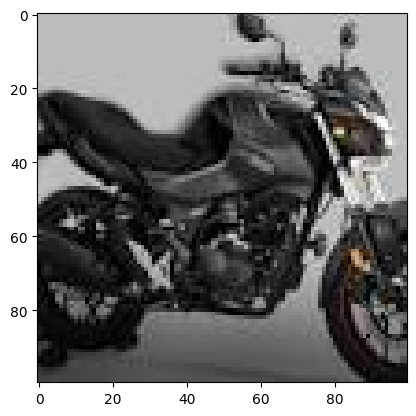

In [32]:
bike_img = plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set/Bike/Bike (1).jpeg')
plt.imshow(bike_img)
print(bike_img)

[[[187  40  46]
  [183  36  42]
  [181  31  40]
  ...
  [ 30   6   4]
  [ 30   6   4]
  [ 30   6   4]]

 [[161  25  29]
  [162  26  30]
  [167  28  33]
  ...
  [ 29   9   8]
  [ 30   9   8]
  [ 29   9   8]]

 [[175  59  59]
  [174  58  58]
  [171  55  55]
  ...
  [ 28  14  13]
  [ 29  13  13]
  [ 28  14  13]]

 ...

 [[198 123  94]
  [194 119  90]
  [188 113  84]
  ...
  [207 173 164]
  [202 168 159]
  [197 163 154]]

 [[188 113  84]
  [186 111  82]
  [184 109  80]
  ...
  [202 168 159]
  [194 160 151]
  [189 155 146]]

 [[183 108  79]
  [183 108  79]
  [183 108  79]
  ...
  [193 159 150]
  [190 156 147]
  [193 159 150]]]


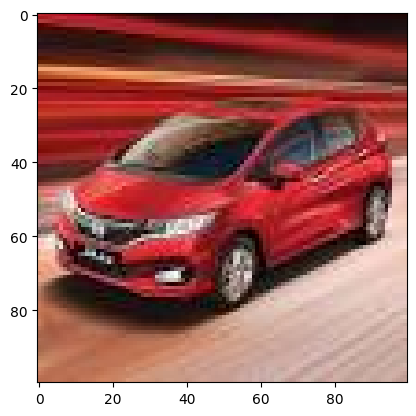

In [33]:
car_img = plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set/Car/Car (1).jpeg')
plt.imshow(car_img)
print(car_img)

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data_set_path = ('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset')

In [36]:
train_data_path = ('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set')

In [37]:
test_data_path = ('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set')

In [38]:
img_height,img_width  = 150,150

In [39]:
from glob import glob
glob('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set/*')   #for train data

['/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set/Car',
 '/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set/Bike']

In [40]:
glob('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set/*')   #for test data

['/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set/Bike',
 '/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set/Car']

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_data_preprocessing = ImageDataGenerator(rescale = 1./255.,
                                             horizontal_flip = True,
                                             shear_range = 0.2,
                                             zoom_range = 0.2)

In [43]:
test_data_preprocessing = ImageDataGenerator(rescale = 1./255.)

In [44]:
labels = ('Car','Bike')

In [45]:
train_data = train_data_preprocessing.flow_from_directory(train_data_path,classes = labels,class_mode = 'binary',target_size = (img_height,img_width),batch_size = 10)

Found 3200 images belonging to 2 classes.


In [46]:
test_data = test_data_preprocessing.flow_from_directory(test_data_path,classes = labels,class_mode = 'binary',target_size = (img_height,img_width),batch_size = 10)

Found 800 images belonging to 2 classes.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,sigmoid,softmax

- Developing Architecture

In [48]:
from keras.api._v2.keras import activations
model = Sequential()

#1st Filter and Maxpool layer
model.add(Conv2D(128,kernel_size=(3,3),padding='same',input_shape=(img_height,img_width,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd filter and Maxpool layer
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#3rd filter and maxpool layer
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#4th filter layer and maxpool layer
model.add(Conv2D(10,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())

#1D array data to ANN
model.add(Dense(32,activation='relu')) #Hidden layer-1
model.add(Dense(16,activation='relu')) #Hidden Layer-2

#Output layer
model.add(Dense(1,activation='sigmoid'))


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 75, 75, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 18, 18, 32)       

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [51]:
import warnings
warnings.filterwarnings("ignore")


In [52]:
model.fit(train_data,epochs=10)

Epoch 1/10
320/320 [==============================] - 321s 989ms/step - loss: 0.5655 - Accuracy: 0.7009
Epoch 2/10
320/320 [==============================] - 29s 91ms/step - loss: 0.3409 - Accuracy: 0.8553
Epoch 3/10
320/320 [==============================] - 29s 90ms/step - loss: 0.2402 - Accuracy: 0.8978
Epoch 4/10
320/320 [==============================] - 30s 93ms/step - loss: 0.2033 - Accuracy: 0.9222
Epoch 5/10
320/320 [==============================] - 30s 92ms/step - loss: 0.1874 - Accuracy: 0.9269
Epoch 6/10
320/320 [==============================] - 29s 92ms/step - loss: 0.1780 - Accuracy: 0.9269
Epoch 7/10
320/320 [==============================] - 29s 91ms/step - loss: 0.1605 - Accuracy: 0.9362
Epoch 8/10
320/320 [==============================] - 29s 91ms/step - loss: 0.1451 - Accuracy: 0.9425
Epoch 9/10
320/320 [==============================] - 29s 91ms/step - loss: 0.1282 - Accuracy: 0.9491
Epoch 10/10
320/320 [==============================] - 29s 91ms/step - loss: 0.1

In [53]:
training_loss = model.history.history['loss']

training_loss

[0.5654818415641785,
 0.34093621373176575,
 0.24019595980644226,
 0.20326019823551178,
 0.18735148012638092,
 0.17803452908992767,
 0.1604718714952469,
 0.1450796276330948,
 0.12819156050682068,
 0.13653168082237244]

In [54]:
training_acc = model.history.history['Accuracy']

training_acc

[0.7009375095367432,
 0.8553125262260437,
 0.8978124856948853,
 0.9221875071525574,
 0.9268749952316284,
 0.9268749952316284,
 0.9362499713897705,
 0.9424999952316284,
 0.9490625262260437,
 0.948437511920929]

EDA for Model validation

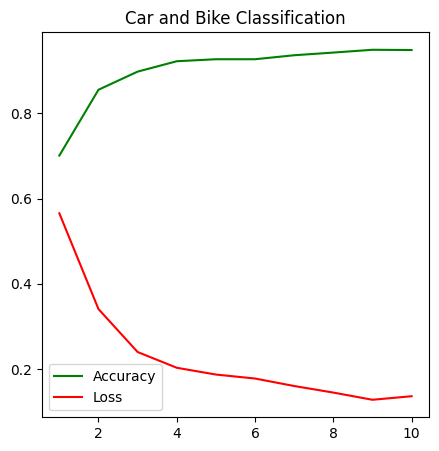

In [56]:
from keras.src.engine import training
plt.figure(figsize = (5,5))
plt.plot(np.arange(1,11),training_acc,color = 'g',label ='Accuracy')
plt.plot(np.arange(1,11),training_loss,color = 'r', label = 'Loss')
plt.title('Car and Bike Classification')
plt.legend(loc=0)
plt.show()

2 Different images of bikes and cars from dataset to test the model

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


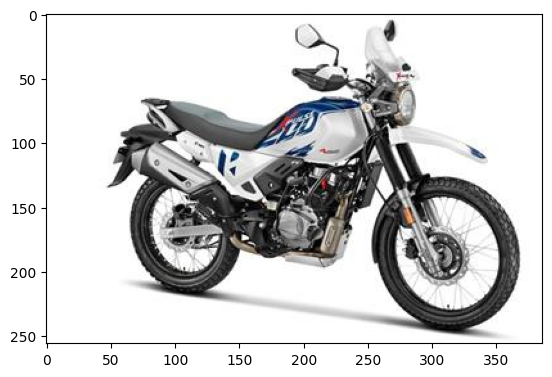

In [57]:
image_1 = plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/Hero-MotoCorp-Xpulse-200-4V-290520231049.jpg')
print(image_1)
plt.imshow(image_1)

[[[ 78  79  84]
  [ 78  79  84]
  [ 78  79  84]
  ...
  [118 118 120]
  [118 118 120]
  [118 118 120]]

 [[ 78  79  84]
  [ 78  79  84]
  [ 78  79  84]
  ...
  [119 119 121]
  [119 119 121]
  [119 119 121]]

 [[ 78  79  84]
  [ 78  79  84]
  [ 78  79  84]
  ...
  [119 119 121]
  [119 119 121]
  [119 119 121]]

 ...

 [[ 77  82  88]
  [ 77  82  88]
  [ 77  82  88]
  ...
  [ 93  97 106]
  [ 93  97 106]
  [ 93  97 106]]

 [[ 77  82  88]
  [ 77  82  88]
  [ 77  82  88]
  ...
  [ 93  97 106]
  [ 93  97 106]
  [ 93  97 106]]

 [[ 77  82  88]
  [ 77  82  88]
  [ 77  82  88]
  ...
  [ 93  97 106]
  [ 93  97 106]
  [ 93  97 106]]]


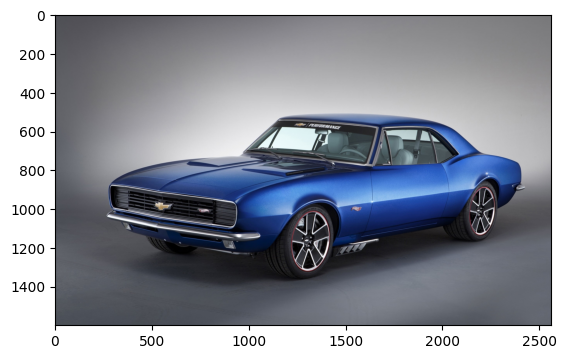

In [58]:
image_2=plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/1242328-muscle-car-wallpaper-hd-2560x1600-for-tablet.jpg')
print(image_2)
plt.imshow(image_2)

In [59]:
import cv2

In [67]:
def pred(path):
  img=plt.imread(path)
  print(img.shape)

  img=cv2.resize(img,(150,150))  #resizing the image using cv2
  print(img.shape)

  img=np.array(img)/255.0  #rescaling the image

  # Now we need to make sure convert data into Deep learning CNN trained Manner
  img=np.expand_dims(img,axis = 0) #expanding the dimension og image
  print(img.shape)

  result = model.predict(img)
  print(result)

  if result[0][0] > 0.5:
    print('Image prediction = Bike')
  else:
    print('Image prediction = Car')

  image = plt.imread(path)
  plt.imshow(image)

(256, 386, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 29ms/step
[[1.]]
Image prediction = Bike


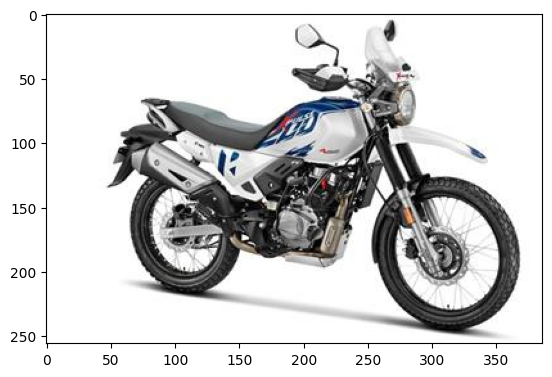

In [68]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/Hero-MotoCorp-Xpulse-200-4V-290520231049.jpg')

(444, 710, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 31ms/step
[[0.10447125]]
Image prediction = Car


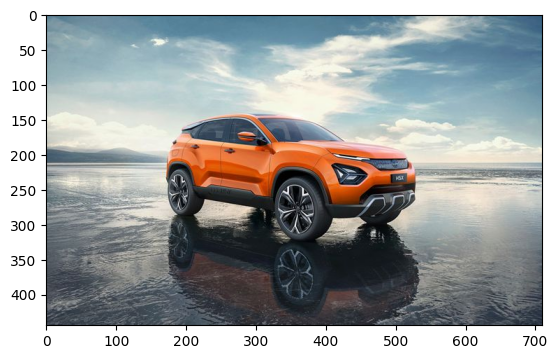

In [72]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/2e2669c8a1c083bee2fc0d4c3889b042.jpg')

(510, 680, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 18ms/step
[[1.]]
Image prediction = Bike


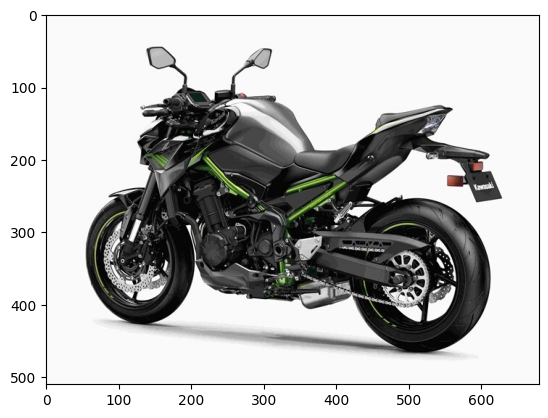

In [70]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/2022-kawasaki-z900-11.jpg')

(1600, 2560, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 18ms/step
[[3.6562924e-05]]
Image prediction = Car


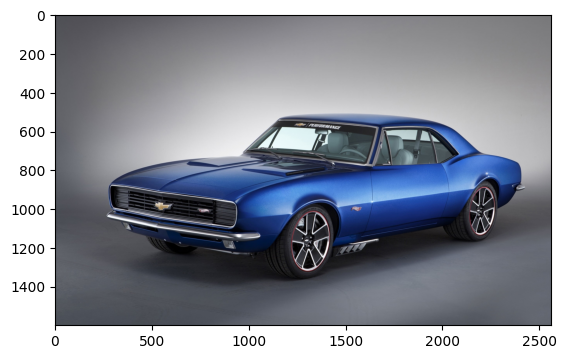

In [71]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/1242328-muscle-car-wallpaper-hd-2560x1600-for-tablet.jpg')

(1200, 1200, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 25ms/step
[[0.9986022]]
Image prediction = Bike


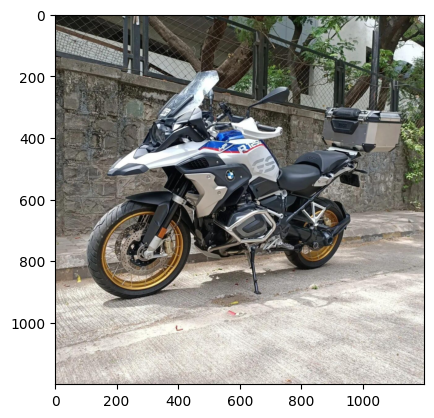

In [73]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/Bmw1250.jpeg')

(168, 300, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 27ms/step
[[0.04867302]]
Image prediction = Car


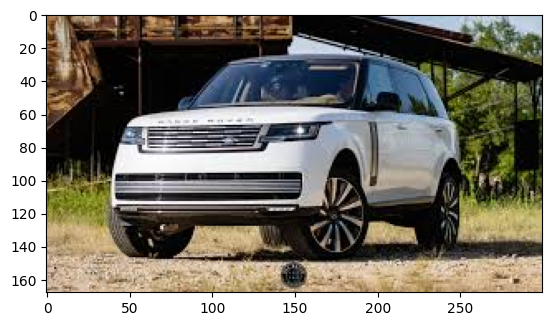

In [74]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/range rover.jpeg')